In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

adult_path = os.path.join(mglearn.datasets.DATA_PATH, 'adult.data')
data = pd.read_csv(adult_path, header = None, index_col = False, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print(f"Original features:\n{list(data.columns)}")
data_dummies = pd.get_dummies(data)
print(f"Features after get_dummies:\n{list(data_dummies.columns)}")

Original features:
['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
Features after get_dummies:
['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspc

In [8]:
print(data_dummies.shape)
data_dummies.head()

(32561, 46)


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape {X.shape}, y.shape: {y.shape}")

X.shape (32561, 44), y.shape: (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
print(f"Test score: {(logreg.score(X_test, y_test)):.2f}")

Test score: 0.81


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [3]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [4]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


(100, 1)
(100,)


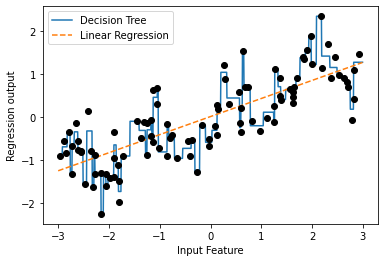

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
print(X.shape)
print(y.shape)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = "Linear Regression")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc = "best")

In [10]:
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [11]:
which_bin = np.digitize(X, bins = bins)
print(f"Data points:\n{X[:5]}")
print(f"Bin membership for data ponts:\n{which_bin[:5]}")

Data points:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Bin membership for data ponts:
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input Feature')

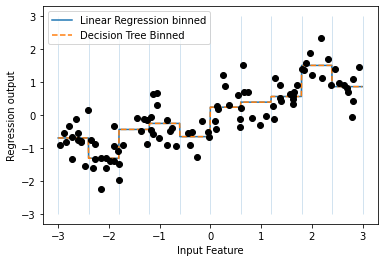

In [22]:
line_binned = encoder.transform(np.digitize(line, bins = bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "Linear Regression binned")

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = "Decision Tree Binned")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(bins, -3, 3, linewidth = 1, alpha = 0.2)
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input Feature")

In [24]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(100, 11)
[[-0.75275929  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.70428584  0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.        ]
 [ 1.39196365  0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 0.59195091  0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.        ]
 [-2.06388816  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


Text(0.5, 0, 'Input Feature')

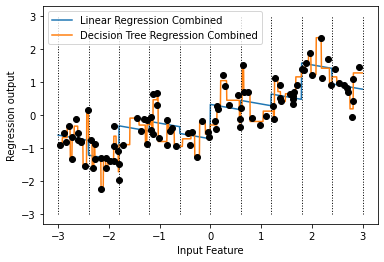

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = 'Linear Regression Combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c = 'k', linewidth = 1)

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input Feature")

In [28]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

(100, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.59195091  0.          0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

-3.0
-2.4
-1.8
-1.2000000000000002
-0.6000000000000001
0.0
0.5999999999999996
1.2000000000000002
1.7999999999999998
2.3999999999999995
3.0


Text(0.5, 0, 'Input Feature')

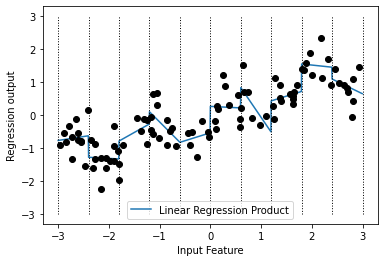

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label = "Linear Regression Product")

for bin in bins:
 print(bin)
 plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input Feature")

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)
print(f"X_poly.shape: {X_poly.shape}")
print(f"Entries of X:\n{X[:5]}")
print(f"Entries of X_poly:\n{X_poly[:5]}")

X_poly.shape: (100, 10)
Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [35]:
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


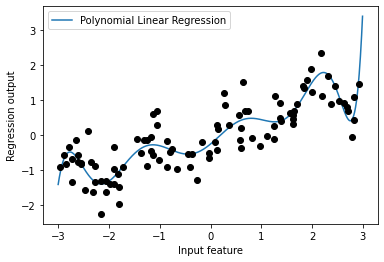

In [37]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = "Polynomial Linear Regression")
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = 'best')

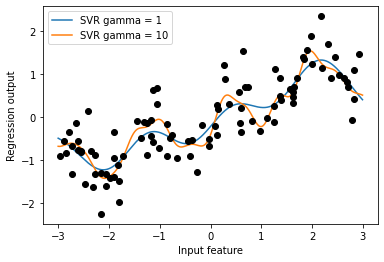

In [39]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = "SVR gamma = {}".format(gamma))

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = 'best')

In [42]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [44]:
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print(f"Score without interactions: {(ridge.score(X_test_scaled, y_test)):.3f}")
ridge = Ridge().fit(X_train_poly, y_train)
print(f"Score with interactions: {(ridge.score(X_test_poly, y_test)):.3f}")

Score without interactions: 0.621
Score without interactions: 0.753


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled, y_train)
print(f"Score without interactions: {(rf.score(X_test_scaled, y_test)):.3f}")
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_poly, y_train)
print(f"Score with interactions: {(rf.score(X_test_poly, y_test)):.3f}")

Score without interactions: 0.789
Score with interactions: 0.759


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
print(X_org.shape)
print(X_org[:10])
w = rnd.normal(size = 3)
print(w)
X = rnd.poisson(10 * np.exp(X_org))
print(X[:5])
y = np.dot(X_org, w)
print(y[:5])

(1000, 3)
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574 -2.55298982]
 [ 0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852]
 [-0.18718385  1.53277921  1.46935877]]
[ 1.59327362  0.5687224  -0.11448705]
[[56 18 27]
 [81 57  3]
 [25  9 11]
 [20 13 30]
 [27 13 13]]
[2.92614361 4.74436373 1.4394878  0.56962109 1.23092405]


In [3]:
print(f"Number of feature appearances:\n{np.bincount(X[:, 0])}")

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

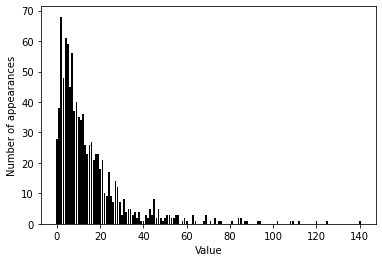

In [9]:
bins0 = np.bincount(X[:, 0])
plt.bar(range(len(bins0)), bins0, color = 'k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Text(0.5, 0, 'Value')

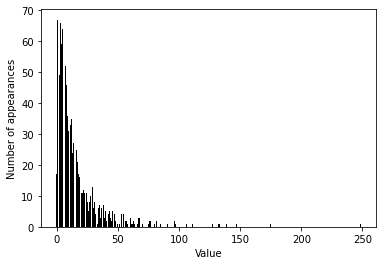

In [8]:
bins1 = np.bincount(X[:, 1])
plt.bar(range(len(bins1)), bins1, color = 'k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Text(0.5, 0, 'Value')

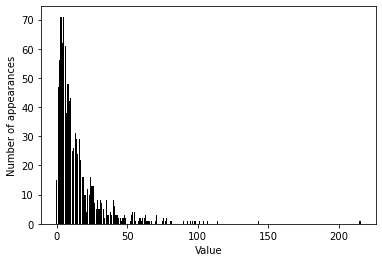

In [10]:
bins2 = np.bincount(X[:, 2])
plt.bar(range(len(bins2)), bins2, color = 'k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f"Test score: {(score):.3f}")

Test score: 0.622


Text(0.5, 0, 'Value')

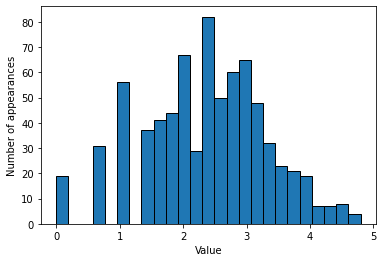

In [14]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:, 0], bins = 25, edgecolor = 'k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [16]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f"Test score: {(score):.3f}")

Test score: 0.875


In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
print(cancer.data.shape)
print(noise.shape)
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = 0.5)
select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print(f"X_train_selected.shape: {X_train_selected.shape}")

(569, 30)
(569, 50)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
(80,)


([], [])

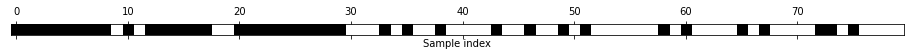

In [24]:
mask = select.get_support()
print(mask)
print(mask.shape)
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [28]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Score with all features: {(lr.score(X_test, y_test)):.3f}")
lr.fit(X_train_selected, y_train)
print(f"Score with only selected features: {(lr.score(X_test_selected, y_test)):.3f}")

Score with all features: 0.916
Score with only selected features: 0.919


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')

In [30]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], [])

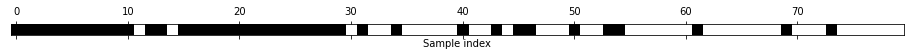

In [31]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [37]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter = 1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f"Test score: {(score):.3f}")

Test score: 0.954


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


([], [])

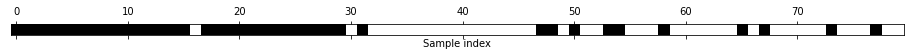

In [39]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [44]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter = 10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Test score: {(score):.3f}")

Test score: 0.940


In [45]:
citibike = mglearn.datasets.load_citibike()

In [49]:
print(citibike.values.shape)
print(citibike[:10])

(248,)
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
2015-08-02 00:00:00     3
2015-08-02 03:00:00     4
Freq: 3H, Name: one, dtype: int64


In [52]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9
print(X[:5])
X_hour = citibike.index.hour.values.reshape(-1, 1)
print(X_hour[:5])

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]]
[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]]


In [53]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
print(X_hour_week[:5])

[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]]


In [55]:
print(citibike.index.dayofweek.values[:5])

[5 5 5 5 5]


In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from IPython.display import display

citibike = mglearn.datasets.load_citibike()

In [2]:
print(f"Citi bike data:\n {citibike.head()}")

Citi bike data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [3]:
print(citibike.shape)

(248,)


Text(0, 0.5, 'Rentals')

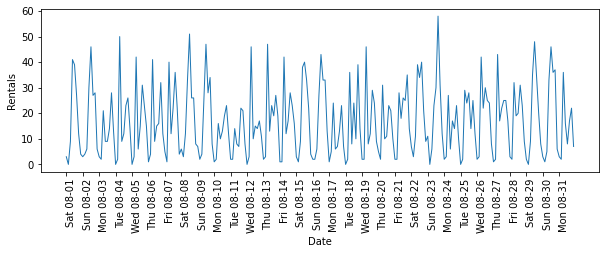

In [6]:
plt.figure(figsize = (10, 3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation = 90, ha = 'left')
plt.plot(citibike, linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [8]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1)//10**9

In [15]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {(regressor.score(X_test, y_test)):.3f}")
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation = 90, ha = 'left')
    plt.plot(range(n_train), y_train, label="Train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="Test")
    plt.plot(range(n_train), y_pred_train, '--', label="Prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="Prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.035


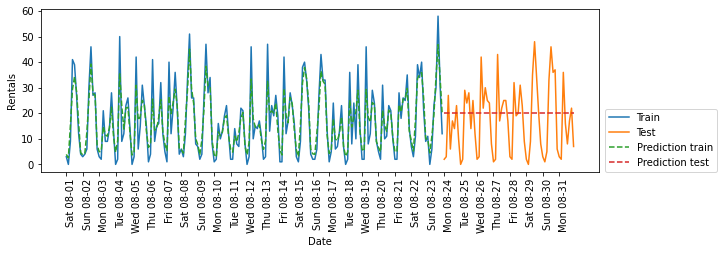

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.600


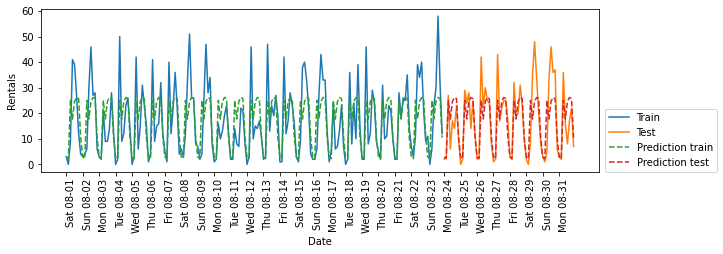

In [18]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.842


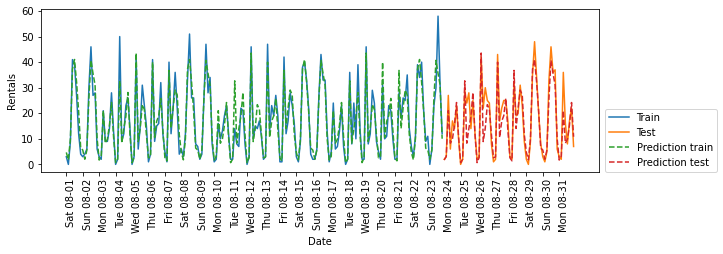

In [20]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.132


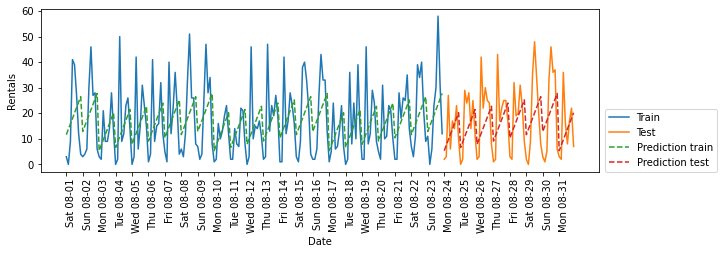

In [24]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_hour_week_onehot = encoder.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.622


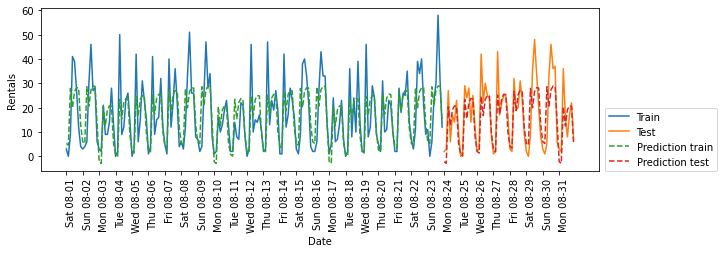

In [26]:
eval_on_features(X_hour_week_onehot, y, LinearRegression())

Test-set R^2: 0.845


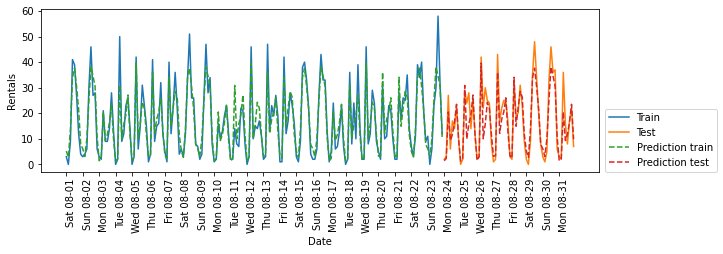

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [30]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

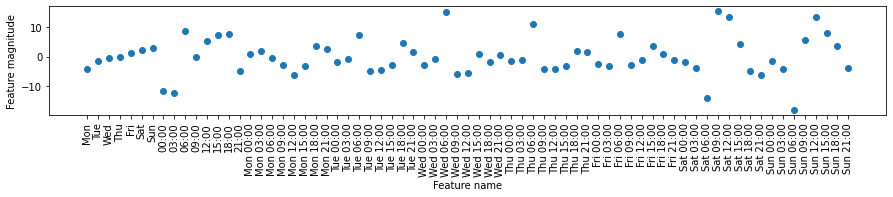

In [31]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")